# Read the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dataFrame = pd.read_pickle(r'../data/7587_corrige.pkl')
dataFrame.head()
#print(dataFrame.label.to_string())
#print(dataFrame.dtypes)

,companyName,companyUrl,jobTitle,dateRange,location,description,logoUrl,label
id,,,,,,,,
548398365_0,TEHTRIS,https://www.linkedin.com/company/tehtris/,R&D Cybersecurity Consultant,oct. 2021 – Aujourd’hui,"Bordeaux, Nouvelle-Aquitaine, France",None,https://media-exp1.licdn.com/dms/image/C4D0BAQ...,NaN
548398365_1,CHEOPS TECHNOLOGY,https://www.linkedin.com/company/cheops-techno...,Ingénieur en data mining,sept. 2020 – sept. 2021,"Bordeaux, Nouvelle-Aquitaine, France",None,https://media-exp1.licdn.com/dms/image/C560BAQ...,2.0
551303934_0,ALTEN,https://www.linkedin.com/company/alten/,Stagiaire ingénieur en intelligence artificiel...,juil. 2021 – Aujourd’hui,"Rennes, Bretagne, France",Conception et programmation pour une plateform...,https://media-exp1.licdn.com/dms/image/C4D0BAQ...,4.0
551303934_1,FRANCE SECURITE,https://www.linkedin.com/company/france-securite/,Stagiaire en développement logiciel,juin 2019 – août 2019,"Bordeaux, Aquitaine, France",Développement et mises à jour d’applications c...,https://media-exp1.licdn.com/dms/image/C4D0BAQ...,2.0
551303934_2,OASU (Observatoire Aquitain des Sciences de l'...,None,Stagiaire en développement Web,avr. 2018 – juin 2018,"Bordeaux, Aquitaine, France",Création et évolution d’une application Web d’...,,1.0


All fields are strings except for *label*, which is a float number.

- **id** : Work experience ID (unique) in the format *profileID_numWorkExperience* (e.g. 548398365_0: latest work experience of the user whose ID is 548398365).
- **companyName** : Company where the user has worked.
- **companyUrl** : URL of the LinkedIn page of the company.
- **jobTitle** : Work experience title.
- **dataRange** : Date range of the work experience in the format: *startDate - endDate · duration* or *date · duration* (if startDate = endDate) (e.g. sept. 2020 - déc. 2020 · 4 mois)
- **location** : Location of the work experience. Here there are only profiles with at least one work experience in one of the 5 cities in France : Bordeaux, Nice, Lille, Lyon and Strasbourg.
- **description** : Work experience description (under the job title of an experience on the user's profile)
- **logoUrl** : **This variable must be ignored**
- **label** : Work experience are labelled from 0 to 4.
	- **0**: This experience is not related to AI
	- **1**: It's unlikely that it's related to it
	- **2**: We don't know wether it's related or not to it
	- **3**: It's likely that it's related to it
	- **4**: It's related to AI
	- **NaN**: It's often a work experience that should be labelled between 0 and 2, so it's not a work experience related to AI

### Keep only useful variables

In [2]:
df = dataFrame[['jobTitle', 'description']].copy()
df

,jobTitle,description
id,,
548398365_0,R&D Cybersecurity Consultant,None
548398365_1,Ingénieur en data mining,None
551303934_0,Stagiaire ingénieur en intelligence artificiel...,Conception et programmation pour une plateform...
551303934_1,Stagiaire en développement logiciel,Développement et mises à jour d’applications c...
551303934_2,Stagiaire en développement Web,Création et évolution d’une application Web d’...
...,...,...
938061810_6,Opérateur production,Montage de transmission automatique pour véhic...
938061810_7,Technicien réparation informatique,"Reparation et maintenance d'électroménagers, d..."
938061810_8,Technicien réparation,Reparation & maintenance d'appareils électromé...


### After merging and removing empty values

In this project we will use **jobTitle**, **description** and **label**.
We remove rows where both title and description are either NaN or empty strings and concatenatee them (there is one empty job title and one NaN job titlee in total)

In [3]:
df = dataFrame[['jobTitle', 'description', 'label']].copy()

# Remove all rows where both jobTitle and description are empty
df['jobTitle'] = df['jobTitle'].replace('',np.nan)
df['description'] = df['description'].replace('',np.nan)
df.dropna(subset=['jobTitle','description'], how='all', inplace=True)

# Replace nan with an empty string and remove the id column
df['jobTitle'] = df['jobTitle'].replace(np.nan, '')
df['description'] = df['description'].replace(np.nan, '')
df.reset_index(drop=True, inplace=True)

# Concatenate
df['title_and_description'] = df['jobTitle'] + '. ' + df['description']
df = df[['title_and_description','label']]

print(f"Size before removing row with NaN titles and descriptions: {len(dataFrame)}.\nAfter removing those: {len(df)}")
df.head()

Size before removing row with NaN titles and descriptions: 11287.
After removing those: 11285


,title_and_description,label
0,R&D Cybersecurity Consultant.,NaN
1,Ingénieur en data mining.,2.0
2,Stagiaire ingénieur en intelligence artificiel...,4.0
3,Stagiaire en développement logiciel. Développe...,2.0
4,Stagiaire en développement Web. Création et év...,1.0


## Label distribution

Only 11 % of the dataset examples are likely related to AI (label 3 and 4).

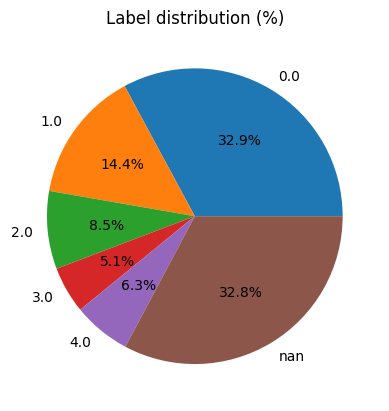

In [4]:
labelDistrib = (df.groupby('label', dropna=False).size() / len(df)) * 100
plt.pie(labelDistrib,labels=labelDistrib.keys(),autopct='%1.1f%%')
plt.title('Label distribution (%)')
plt.show()

We now consider that the labels : nan, 0, 1 and 2 are not related to AI. And labels 3 and 4 are related to it.

{'not AI': 9994, 'AI': 1291}


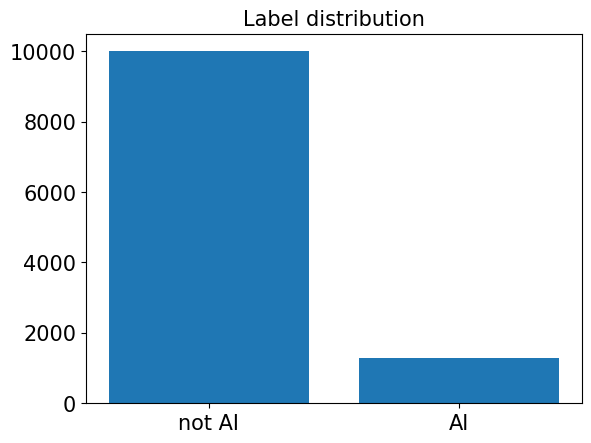

In [5]:
import math

labelGrouped = df.groupby('label', dropna=False).size()

labelDistrib = {'not AI':0, 'AI':0}
for key, size in labelGrouped.items():
    if key is None or math.isnan(key) or key < 3:
        labelDistrib['not AI'] += size
    else:
        labelDistrib['AI'] += size

print(labelDistrib)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.bar(labelDistrib.keys(), labelDistrib.values())
plt.title('Label distribution', fontsize=15)
plt.show()

## Text field size

Here we didn't count NaN values and we only consider string values.
Note that LinkedIn limit for jobTitle length is 100 characters and it's 2000 for the description

Most of the texts are short, for instance the median of the description length is 34 words.
183 texts contains less than 5 words (e.g. "stage d'observation").

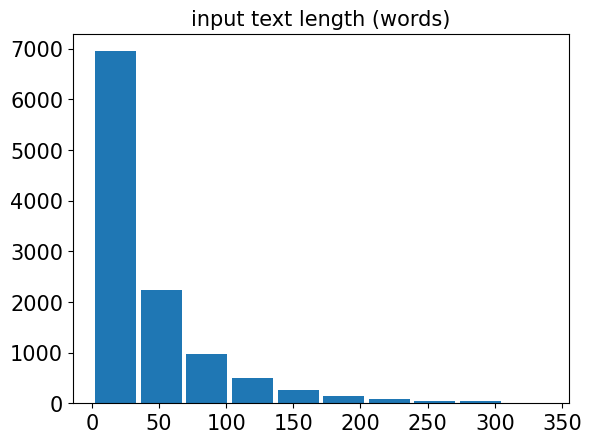

Min input size:  1 words
1st quartile input size:  5 words
Median input size:  24 words
3rd quartile input size:  53 words
Max input size:  340 words


In [6]:
textSize = []
for s in df["title_and_description"]:
    if not (s is None) and type(s) == type(''):
        size = len(s.split())
        #if(size<3):
           # print(s)
        textSize.append(size)

textSize = np.array(textSize)


plt.hist(textSize, rwidth = 0.9)
plt.title('input text length (words)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

print("Min input size: ",round(np.min(textSize)), "words")
print("1st quartile input size: ",round(np.percentile(textSize, 25)), "words")
print("Median input size: ",round(np.median(textSize)), "words")
print("3rd quartile input size: ",round(np.percentile(textSize, 75)), "words")
print("Max input size: ",round(np.max(textSize)), "words")

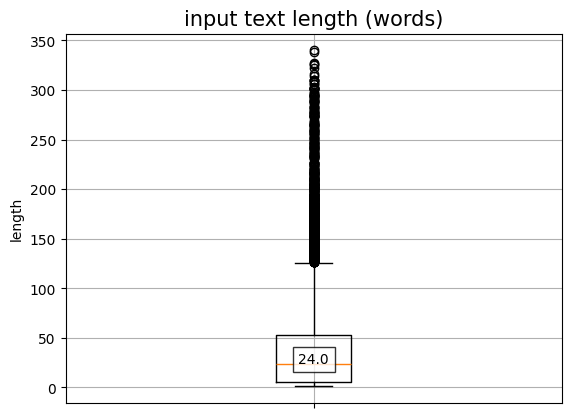

In [7]:
textSize = []
for s in df["title_and_description"]:
    if not (s is None) and type(s) == type(''):
        size = len(s.split())
        #if(size<3):
           # print(s)
        textSize.append(size)

textSize = np.array(textSize)
median = np.median(textSize)

plt.boxplot(textSize)
plt.xticks(ticks=[1], labels=[''])

plt.text(1, median, f'{median}', ha='center', bbox = dict(facecolor = 'white', alpha =.8))

plt.title('input text length (words)', fontsize=15)
plt.xlabel('')
plt.ylabel('length')

plt.grid(True)
plt.show()

## Languages

Most of the work experience descriptions are written in french (more than 6000), a lot of them are in english (more than 1000) and at least one of them is in German.
Note that langdetect can only give a rough idea of the language but there are several errors (e.g. it detects italian instead of french)

In [8]:
# Get 100 random rows
# np.random.seed(42) # use a seed to get the same results
# random_rows = df.sample(n=100)

# Detect the languages
from langdetect import detect

languages = {"not detected": 0}
# for text in random_rows['title_and_description']:
for text in df['title_and_description']:
    # print(text)
    # print(f"\n__END OF TEXT ({i})__\n")
    if text is None or type(text) != type('') or len(text) <= 0:
        continue
    
    try:
        lang = detect(text)
        if lang in languages:
            languages[lang] +=1
        else:
            languages[lang] = 1
                
        #if(lang!='fr' and lang != 'en'):
           # print("START_",text,"_END")
    except:
        # the text could not be analyzed (maybe because it's an URL)
        languages["not detected"] += 1

print(languages)

{'not detected': 0, 'en': 2231, 'id': 15, 'fr': 8210, 'nl': 67, 'de': 231, 'it': 170, 'ca': 91, 'af': 58, 'pt': 37, 'tl': 29, 'da': 38, 'es': 23, 'sl': 1, 'no': 15, 'hr': 8, 'vi': 2, 'hu': 3, 'ro': 35, 'so': 4, 'et': 3, 'sk': 1, 'pl': 2, 'tr': 1, 'sv': 1, 'cy': 2, 'lt': 3, 'fi': 3, 'sq': 1}


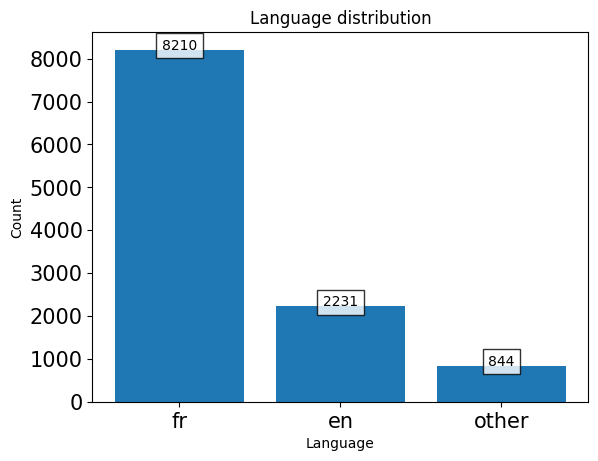

In [9]:
fr_en_other_counts = {"fr":0, "en":0, "other":0}

for lang, count in languages.items():
    if lang == "fr" or lang == "en":
        fr_en_other_counts[lang] = count
    else:
        fr_en_other_counts["other"] += count

x = list(fr_en_other_counts.keys())
y = list(fr_en_other_counts.values())

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

for i in range(len(y)):
    plt.text(i, y[i], f'{y[i]}', ha = 'center', bbox = dict(facecolor = 'white', alpha =.8))

plt.bar(x, y)

plt.title("Language distribution")
plt.xlabel("Language")
plt.ylabel("Count")

plt.show()